<a href="https://colab.research.google.com/github/ummadiviany/MachineLearning/blob/master/Large_image_slicer_Patcher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
import cv2
from google.colab.patches import cv2_imshow

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
img='/content/gdrive/My Drive/train/DJI_0015.JPG'
img=cv2.imread(img)
#cv2_imshow(img)
size=(500,500)

In [0]:

def extract_patches_2D(img,size):
    patch_H, patch_W = min(img.size(2),size[0]),min(img.size(3),size[1])
    patches_fold_H = img.unfold(2, patch_H, patch_H)
    if(img.size(2) % patch_H != 0):
        patches_fold_H = torch.cat((patches_fold_H,img[:,:,-patch_H:,].permute(0,1,3,2).unsqueeze(2)),dim=2)
    patches_fold_HW = patches_fold_H.unfold(3, patch_W, patch_W)
    if(img.size(3) % patch_W != 0):
        patches_fold_HW = torch.cat((patches_fold_HW,patches_fold_H[:,:,:,-patch_W:,:].permute(0,1,2,4,3).unsqueeze(3)),dim=3)
    patches = patches_fold_HW.permute(0,2,3,1,4,5).reshape(-1,img.size(1),patch_H,patch_W)
    return patches

import matplotlib.pyplot as plt
from torchvision.utils import make_grid


patches = extract_patches_2D(img,size)
print(patches.shape)
nrow = int(np.ceil(float(img.size(3))/size[1]))
show_patches = make_grid(patches,nrow=nrow).permute(1,2,0).numpy()
plt.imshow(show_patches)
plt.show()


TypeError: ignored

Original image shape: (3000, 4000, 3)
(3000, 4000, 3)
(48, 500, 500, 3)


ValueError: ignored

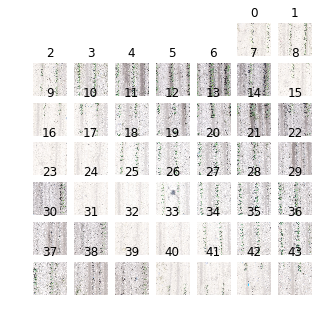

In [0]:
import tensorflow as tf
from skimage import io
import matplotlib.pyplot as plt


def image_to_patches(image, patch_height, patch_width):
    # resize image so that it's dimensions are dividable by patch_height and patch_width
    image_height = tf.cast(tf.shape(image)[0], dtype=tf.float32)
    image_width = tf.cast(tf.shape(image)[1], dtype=tf.float32)
    height = tf.cast(tf.ceil(image_height / patch_height) * patch_height, dtype=tf.int32)
    width = tf.cast(tf.ceil(image_width / patch_width) * patch_width, dtype=tf.int32)

    num_rows = height // patch_height
    num_cols = width // patch_width
    # make zero-padding
    image = tf.squeeze(tf.image.resize_image_with_crop_or_pad(image, height, width))

    # get slices along the 0-th axis
    image = tf.reshape(image, [num_rows, patch_height, width, -1])
    # h/patch_h, w, patch_h, c
    image = tf.transpose(image, [0, 2, 1, 3])
    # get slices along the 1-st axis
    # h/patch_h, w/patch_w, patch_w,patch_h, c
    image = tf.reshape(image, [num_rows, num_cols, patch_width, patch_height, -1])
    # num_patches, patch_w, patch_h, c
    image = tf.reshape(image, [num_rows * num_cols, patch_width, patch_height, -1])
    # num_patches, patch_h, patch_w, c
    return tf.transpose(image, [0, 2, 1, 3])


#image = io.imread('http://www.petful.com/wp-content/uploads/2011/09/slow-blinking-cat.jpg')
image = io.imread('/content/gdrive/My Drive/train/DJI_0015.JPG')
print('Original image shape:', image.shape)
tile_size = 500
image = tf.constant(image)
tiles = image_to_patches(image, tile_size, tile_size)

sess = tf.Session()
I, tiles = sess.run([image, tiles])
print(I.shape)
print(tiles.shape)


plt.figure(figsize=(1 * (4 + 1), 5))
plt.subplot(5, 1, 1)
plt.imshow(I)
plt.title('original')
plt.axis('off')
for i, tile in enumerate(tiles):
    plt.subplot(7, 7, 5 + 1 + i)
    plt.imshow(tile)
    plt.title(str(i))
    plt.axis('off')
plt.show()

In [0]:
from sklearn.datasets import load_sample_image
from sklearn.feature_extraction import image
# Use the array data from the first image in this dataset:
one_image = io.imread("/content/gdrive/My Drive/train/DJI_0015.JPG")
print('Image shape: {}'.format(one_image.shape))

patches = image.extract_patches_2d(one_image, (300, 300),100)
print('Patches shape: {}'.format(patches.shape))

# Here are just two of these patches:
#print(patches[1]) 




#print(patches[800])

Image shape: (3000, 4000, 3)
Patches shape: (100, 300, 300, 3)


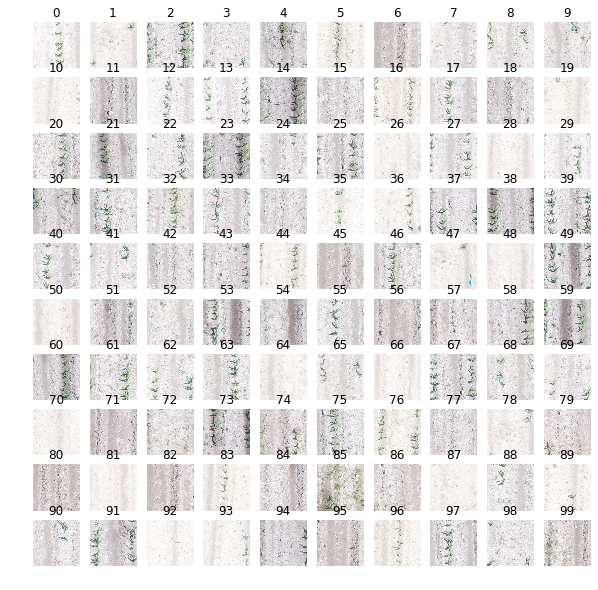

In [0]:
plt.figure(figsize=(10, 10))
for i, patch in enumerate(patches):
    plt.subplot(10, 10, i+1)
    plt.imshow(patches[i])
    io.imsave('/content/gdrive/My Drive/patches/'+str(i)+'.jpg', patches[i]) 
    plt.title(str(i))
    plt.axis('off')
plt.show()